# **1 Cài đặt thư viện**

In [435]:
# !pip install tensorflow

In [436]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import LSTM, GRU, Dense, Input
from keras.models import Model
from sklearn.metrics import mean_absolute_error, mean_squared_error





from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

## **2. Load dữ liệu và tiền xử lý**

In [437]:
data = pd.read_csv("D:\\Kho dữ liệu và kinh doanh thông minh\\DW and BI\\timedatapro.csv")
data

,Date,Absent,AvgWH,Late,OverTime,NOnTime,OnTime
0,1/2/2015,209,7.34,2116,2687,1723,2085
1,1/5/2015,206,7.34,2040,2700,1710,2164
2,1/6/2015,228,7.31,2096,2677,1733,2086
3,1/7/2015,209,7.34,2088,2694,1716,2113
4,1/8/2015,243,7.29,2029,2673,1737,2138
...,...,...,...,...,...,...,...
244,12/24/2015,250,7.28,2069,2649,1761,2091
245,12/28/2015,234,7.30,2116,2673,1737,2060
246,12/29/2015,230,7.31,2115,2654,1756,2065
247,12/30/2015,265,7.25,2063,2644,1766,2082


In [438]:
# Chuyển đổi cột 'date' sang dạng datetime và sắp xếp theo ngày
# data['Date'] = pd.to_datetime(data['Date'])
# data = data.sort_values(by='Date').reset_index(drop=True)

# Đọc dữ liệu
#data = pd.read_csv('data.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)
data

,Absent,AvgWH,Late,OverTime,NOnTime,OnTime
Date,,,,,,
1/2/2015,209,7.34,2116,2687,1723,2085
1/5/2015,206,7.34,2040,2700,1710,2164
1/6/2015,228,7.31,2096,2677,1733,2086
1/7/2015,209,7.34,2088,2694,1716,2113
1/8/2015,243,7.29,2029,2673,1737,2138
...,...,...,...,...,...,...
12/24/2015,250,7.28,2069,2649,1761,2091
12/28/2015,234,7.30,2116,2673,1737,2060
12/29/2015,230,7.31,2115,2654,1756,2065


In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 1/2/2015 to 12/31/2015
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Absent    249 non-null    int64  
 1   AvgWH     249 non-null    float64
 2   Late      249 non-null    int64  
 3   OverTime  249 non-null    int64  
 4   NOnTime   249 non-null    int64  
 5   OnTime    249 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 13.6+ KB


In [440]:
data.describe()

,Absent,AvgWH,Late,OverTime,NOnTime,OnTime
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,225.542169,7.314578,2093.184739,2673.534137,1736.465863,2091.273092
std,14.676321,0.026010,35.366372,18.432523,18.432523,34.232685
min,190.000000,7.210000,2005.000000,2621.000000,1691.000000,1983.000000
25%,215.000000,7.300000,2067.000000,2660.000000,1725.000000,2069.000000
50%,226.000000,7.320000,2094.000000,2674.000000,1736.000000,2091.000000
75%,235.000000,7.330000,2116.000000,2685.000000,1750.000000,2112.000000
max,276.000000,7.380000,2185.000000,2719.000000,1789.000000,2185.000000


In [441]:
data_plan = data['Absent']

In [442]:
data_plan

Date
1/2/2015      209
1/5/2015      206
1/6/2015      228
1/7/2015      209
1/8/2015      243
             ... 
12/24/2015    250
12/28/2015    234
12/29/2015    230
12/30/2015    265
12/31/2015    213
Name: Absent, Length: 249, dtype: int64

## **3. Trực quan hoá dữ liệu**

---



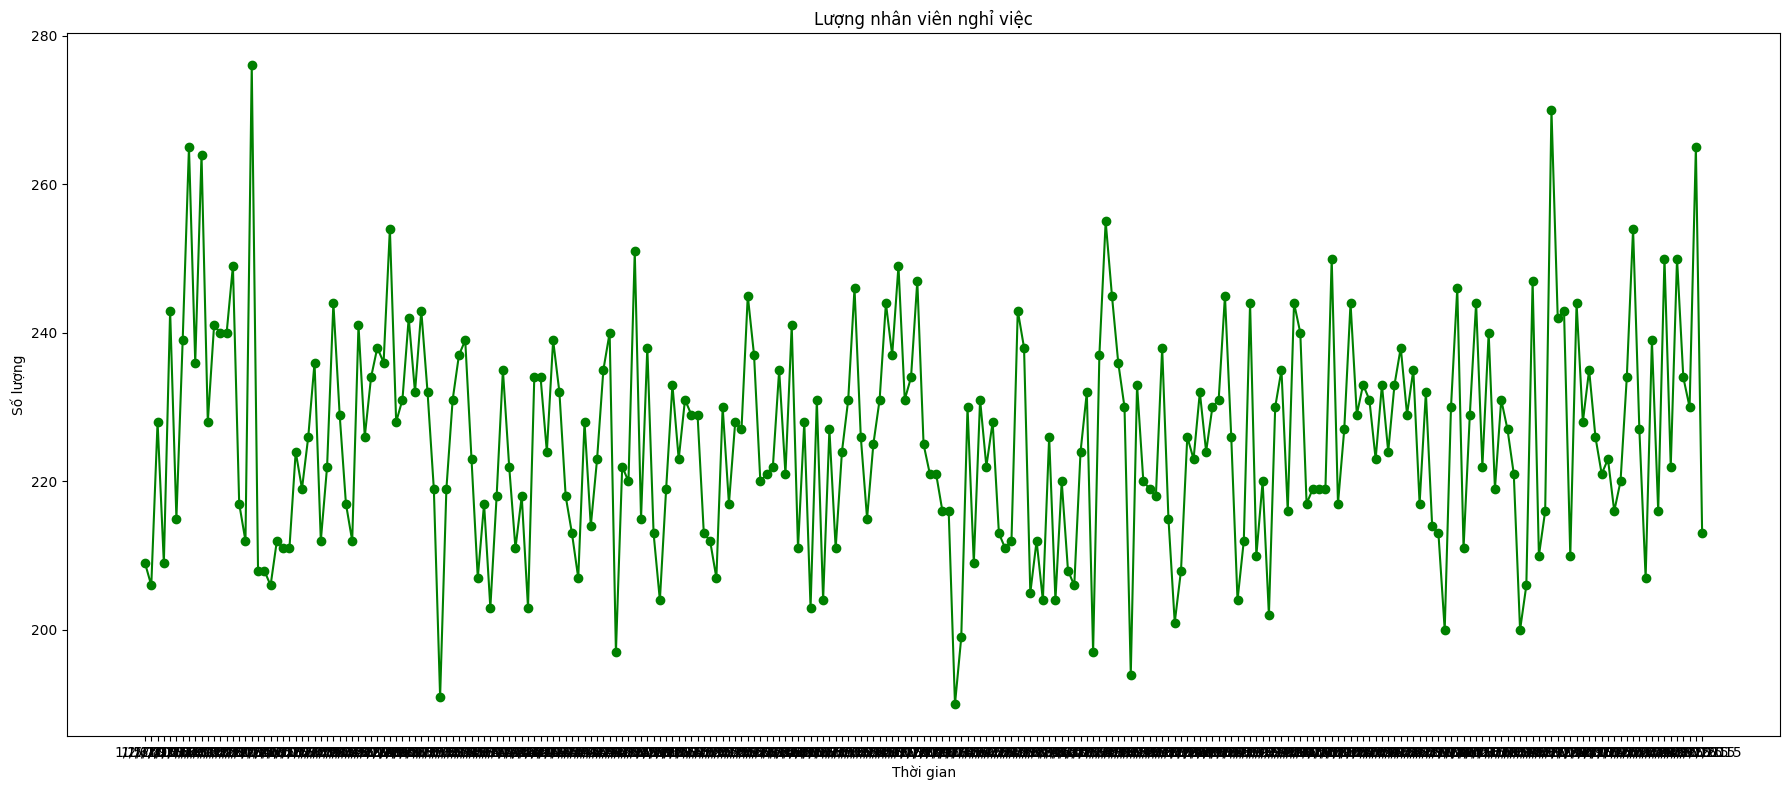

In [443]:
plt.figure(figsize=(18, 8))
plt.plot(data['Absent'], color = 'green',marker='o')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng')
plt.title("Lượng nhân viên nghỉ việc")
plt.tight_layout()
plt.show()

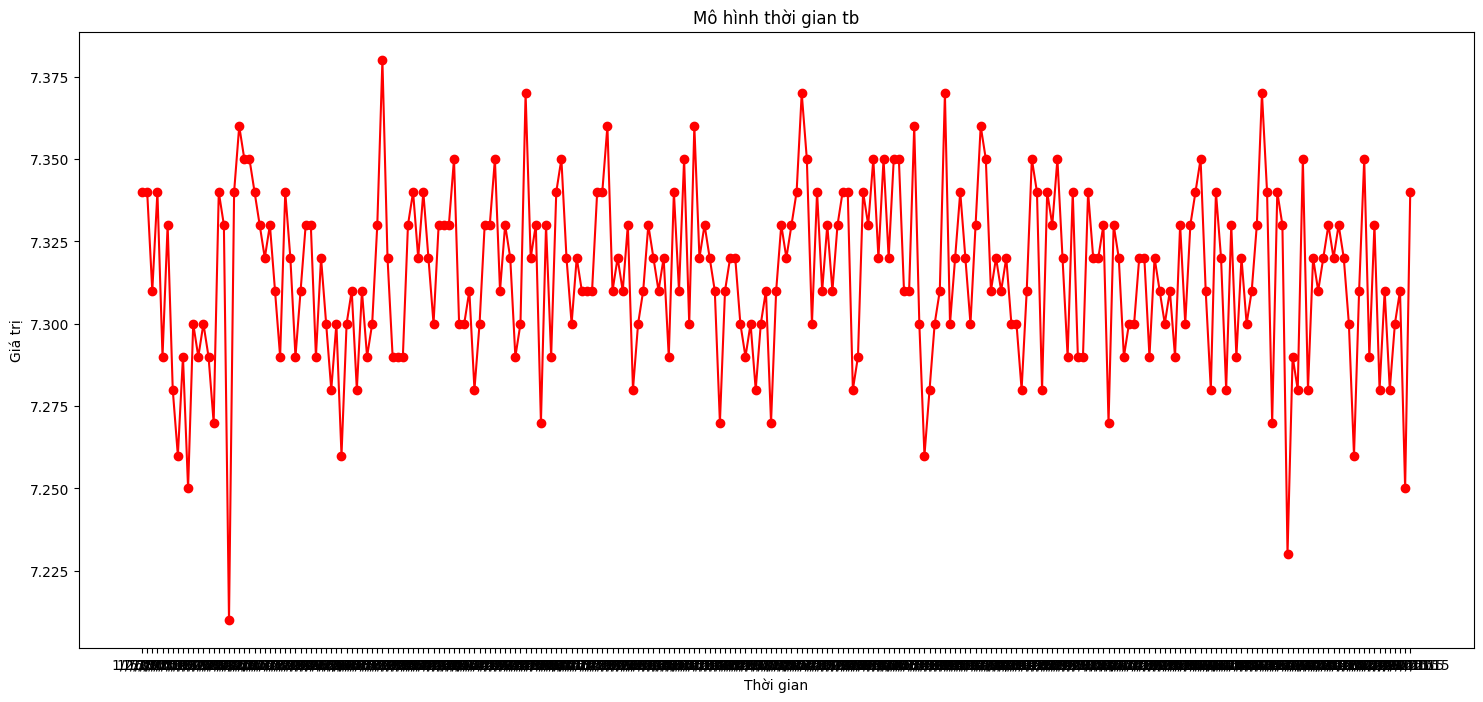

In [444]:
plt.figure(figsize=(18, 8))
plt.plot(data['AvgWH'], color = 'red',marker='o')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị')
plt.title("Mô hình thời gian tb")
plt.show()

## **4. Chuẩn hóa, tạo dữ liệu và chia tập train test 8:2**

In [445]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_plan.values.reshape(-1, 1))


In [446]:
# Hàm tạo dữ liệu đầu vào (X) và đầu ra (y)
def create_sequences(data, look_back=10):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

In [447]:
# Số bước nhìn lại (look_back)
look_back = 10
X, y = create_sequences(data_scaled, look_back)

# Chia dữ liệu thành tập train/test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [448]:
print(X_train.shape)
print(X_test.shape)

(191, 10, 1)
(48, 10, 1)


In [449]:
# Reshape dữ liệu để phù hợp với LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [450]:
print(X_train.shape)
print(X_test.shape)

(191, 10, 1)
(48, 10, 1)


In [451]:
X_train

array([[[0.22093023],
        [0.18604651],
        [0.44186047],
        ...,
        [0.87209302],
        [0.53488372],
        [0.86046512]],

       [[0.18604651],
        [0.44186047],
        [0.22093023],
        ...,
        [0.53488372],
        [0.86046512],
        [0.44186047]],

       [[0.44186047],
        [0.22093023],
        [0.61627907],
        ...,
        [0.86046512],
        [0.44186047],
        [0.59302326]],

       ...,

       [[0.3372093 ],
        [0.69767442],
        [0.31395349],
        ...,
        [0.47674419],
        [0.38372093],
        [0.5       ]],

       [[0.69767442],
        [0.31395349],
        [0.43023256],
        ...,
        [0.38372093],
        [0.5       ],
        [0.39534884]],

       [[0.31395349],
        [0.43023256],
        [0.62790698],
        ...,
        [0.5       ],
        [0.39534884],
        [0.5       ]]])

## **5. Các mô hình dự báo LSTM và GRU**

**5.1. Mô hình LSTM**

In [452]:
# Xây dựng mô hình LSTM
model = Sequential()

# Đầu dự báo cho 'giá trị' và 'lượng'
model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, name='output'))

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# # Huấn luyện mô hình
# model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [453]:
import keras_tuner as kt


# Hàm build_model cho Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # LSTM tầng 1
    model.add(LSTM(
        units=hp.Int('units_layer1', min_value=32, max_value=128, step=16),
        activation=hp.Choice('activation_layer1', ['relu', 'tanh']),
        input_shape=(look_back, 1),
        return_sequences=True
    ))

    model.add(Dropout(rate = hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1)))
    
    # LSTM tầng 2
    model.add(LSTM(
        units=hp.Int('units_layer2', min_value=32, max_value=128, step=16),
        activation=hp.Choice('activation_layer2', ['relu', 'tanh'])
    ))
    
    model.add(Dropout(rate = hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1)))

    # Tầng đầu ra
    model.add(Dense(units=1, name='output'))
    
    # Compile mô hình
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )
    
    return model

In [454]:
# import os

# # Tạo thư mục cha nếu chưa tồn tại
# os.makedirs('my_dir', exist_ok=True)

In [455]:
# Tạo đối tượng tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',      # Tối ưu loss trên tập validation
    max_trials=10,             # Số lượng mô hình thử nghiệm
    executions_per_trial=2,    # Số lần chạy mỗi mô hình
    directory='my_dir',        # Thư mục lưu trữ
    project_name='lstm_tuning' # Tên dự án
)

# Gọi tuner và chuẩn bị dữ liệu
tuner.search(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,                 # Số epoch tối đa
    batch_size=32              # Kích thước batch
)

# Lấy tham số tốt nhất  
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]  
print(best_hps.values)  # Kiểm tra tất cả các giá trị hyperparameters  
print(f'Best units_layer1: {best_hps.get("units_layer1")}')  
print(f'Best activation_layer1: {best_hps.get("activation_layer1")}')  
print(f'Best units_layer2: {best_hps.get("units_layer2")}')  
print(f'Best activation_layer2: {best_hps.get("activation_layer2")}')  
print(f'Best learning_rate: {best_hps.get("learning_rate")}')  


# Huấn luyện mô hình tốt nhất
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32
)


Reloading Tuner from my_dir\lstm_tuning\tuner0.json
{'units_layer1': 48, 'activation_layer1': 'relu', 'units_layer2': 32, 'activation_layer2': 'relu', 'learning_rate': 0.01}
Best units_layer1: 48
Best activation_layer1: relu
Best units_layer2: 32
Best activation_layer2: relu
Best learning_rate: 0.01
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.1229 - val_loss: 0.0229
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0397 - val_loss: 0.0302
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0333 - val_loss: 0.0203
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0291 - val_loss: 0.0205
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0280 - val_loss: 0.0210
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0273 - val_loss: 0.0221
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0290 - val_loss: 0.0204
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0282 - val_loss: 0.0202
Epoch 9/100
5/5 ━━━━━━━━━━━━━

In [456]:
# Dự báo trên tập test
y_pred = best_model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


In [457]:
# Chuyển dữ liệu dự báo và thực tế về giá trị gốc
y_test= scaler.inverse_transform(y_test)
y_pred= scaler.inverse_transform(y_pred)

In [458]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính các chỉ số
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# In kết quả
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 12.712948163350424
Mean Squared Error (MSE): 257.4540758053238
Root Mean Squared Error (RMSE): 16.045375527089536
Mean Absolute Percentage Error (MAPE): 5.494672992000769%
R-squared (R²): -0.04409282243923185


In [459]:
# Hiển thị chỉ số đánh giá của biến số lượng
print('MAE: ', mean_absolute_error(y_test[:,0], y_pred[:,0]))
print('MSE: ', mean_squared_error(y_test[:,0], y_pred[:,0]))
print('RMSE: ', np.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0])))
print('MAPE', np.mean(np.abs((y_test[:,0] - y_pred[:,0]) / y_test[:,0])) * 100)

MAE:  12.712948163350424
MSE:  257.4540758053238
RMSE:  16.045375527089536
MAPE 5.494672992000769


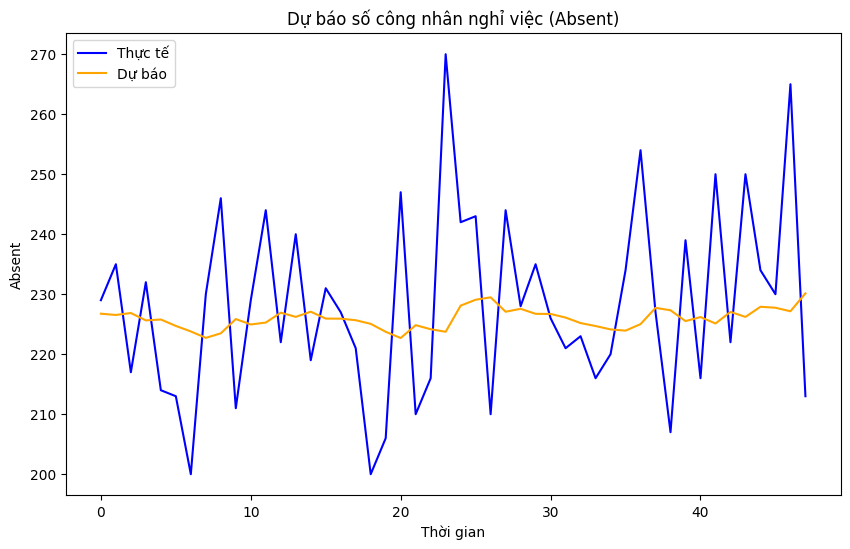

In [460]:
# So sánh giá trị thực tế và dự báo
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Thực tế', color='blue')
plt.plot(y_pred, label='Dự báo', color='orange')
plt.title('Dự báo số công nhân nghỉ việc (Absent)')
plt.xlabel('Thời gian')
plt.ylabel('Absent')
plt.legend()
plt.show()

In [461]:
print(data.index[-1])
# Chuyển đổi chỉ mục thành DatetimeIndex  
data.index = pd.to_datetime(data.index)  # Đảm bảo chỉ mục là kiểu Datetime

12/31/2015


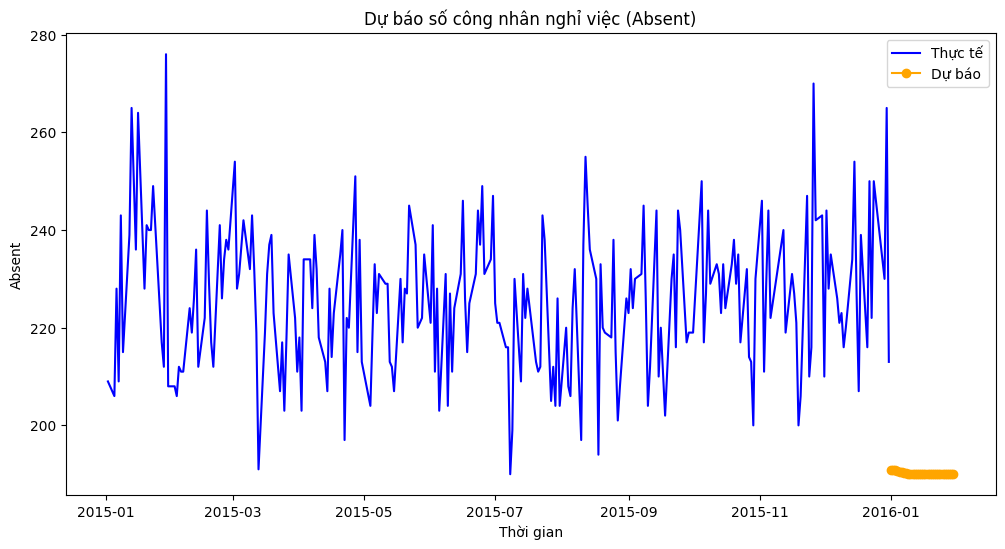

In [ ]:
# Chuẩn bị đầu vào từ 10 ngày cuối cùng trong tập dữ liệu
last_look_back = X_test[-1]  # Lấy dữ liệu cuối cùng từ tập kiểm tra
future_predictions = []  # Lưu các dự báo 30 ngày tiếp theo

# Dự báo tuần tự cho 30 ngày tiếp theo
current_input = last_look_back



# Dự báo 30 ngày tiếp theo
last_sequence = data_scaled[-look_back:]  # Lấy chuỗi 10 ngày cuối cùng
predictions = []

for _ in range(30):  # Dự báo 30 ngày
    pred = model.predict(last_sequence[np.newaxis, :, :], verbose=0)
    predictions.append(pred[0, 0])
    # Cập nhật chuỗi thời gian
    last_sequence = np.vstack([last_sequence[1:], pred])

# Chuyển đổi dự báo về giá trị gốc
predictions_actual = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Absent'], label='Thực tế', color='blue')
future_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=30)
plt.plot(future_dates, predictions_actual, label='Dự báo', color='orange')
plt.title('Dự báo số công nhân nghỉ việc (Absent)')
plt.xlabel('Thời gian')
plt.ylabel('Absent')
plt.legend()
plt.show()

**5.2. Mô hình GRU**

In [463]:
# # Xây dựng mô hình GRU
# model1 = Sequential()

# # Đầu dự báo cho 'giá trị' và 'lượng'
# model1.add(GRU(units=50, activation='relu', input_shape=(look_back, 1), return_sequences=True))
# model1.add(GRU(units=50, activation='relu'))
# model1.add(Dense(units=1, name='output'))

# # Compile mô hình
# model1.compile(optimizer='adam', loss='mean_squared_error')

# # Huấn luyện mô hình
# model1.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


# Xây dựng mô hình GRU
model1 = Sequential()
model1.add(GRU(60, return_sequences=True, input_shape=(look_back, 1)))
model1.add(Dropout(0.2))

model1.add(GRU(60, return_sequences=True))
model1.add(Dropout(0.2))

model1.add(GRU(60, return_sequences=False))
model1.add(Dropout(0.2))

model1.add(Dense(units=1, name='output'))

model1.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
# model1.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

model1.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.2)


Epoch 1/50


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - loss: 0.1414 - val_loss: 0.1013
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0982 - val_loss: 0.0629
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0636 - val_loss: 0.0350
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0384 - val_loss: 0.0216
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0294 - val_loss: 0.0246
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0382 - val_loss: 0.0328
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0516 - val_loss: 0.0331
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0469 - val_loss: 0.0284
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0416 - val_loss: 0.0235
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0354 - val_loss: 0.0211
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0314 - val_loss: 0.0217
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0308 - val_loss: 0.0245
Epoch 13/

In [474]:
print(X_train.shape)
print(y_train.shape)

(191, 10, 1)
(191, 1)


In [464]:
# # Hàm xây dựng mô hình cho Keras Tuner
# def build_model1(hp):
#     model1 = Sequential()
    
#     # Các tham số cần tối ưu
#     units = hp.Int('units', min_value=32, max_value=128, step=16)
#     dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
#     learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')

#     # Định nghĩa kiến trúc mô hình GRU
#     model1.add(GRU(units, return_sequences=True, input_shape=(look_back, 1)))
#     model1.add(Dropout(dropout_rate))
#     model1.add(GRU(units, return_sequences=False))
#     model1.add(Dropout(dropout_rate))
#     model1.add(GRU(units, return_sequences=False))
#     model1.add(Dropout(dropout_rate))
#     model1.add(Dense(1))

#     # Biên dịch mô hình
#     optimizer = Adam(learning_rate=learning_rate)
#     model1.compile(optimizer=optimizer, loss='mean_squared_error')

#     return model


In [465]:
# X_train.shape
# y_train.shape

In [466]:
# from keras_tuner import RandomSearch

# # Định nghĩa tuner
# tuner = RandomSearch(
#     build_model1,
#     objective='val_loss',
#     max_trials=10,  # Số lần thử nghiệm tìm kiếm
#     executions_per_trial=2,  # Số lần thực hiện mỗi thử nghiệm để tính kết quả trung bình
#     directory='tuner_dir1',
#     project_name='GRU_hyperparameter_tuning'
# )

# # Bắt đầu tìm kiếm
# tuner.search(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# # Lấy tham số tốt nhất
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# print(f'Best units: {best_hps.get("units")}')
# print(f'Best dropout_rate: {best_hps.get("dropout_rate")}')
# print(f'Best learning_rate: {best_hps.get("learning_rate")}')


# # Huấn luyện mô hình tốt nhất
# best_model1 = tuner.hypermodel.build(best_hps)
# history = best_model1.fit(
#     X_train, y_train,
#     validation_split=0.2,
#     epochs=100,
#     batch_size=32
# )

In [467]:
# y_pred1 = best_model1.predict(X_test)
y_pred1 = model1.predict(X_test)
y_pred1 = scaler.inverse_transform(y_pred1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


In [468]:
print("Shape of y_test:", y_test.shape)  
print("Shape of y_pred1:", y_pred1.shape)

Shape of y_test: (48, 1)
Shape of y_pred1: (48, 1)


In [469]:
# Hiển thị chỉ số đánh giá theo biến số lượng
print('MAE: ', mean_absolute_error(y_test[:,0], y_pred1[:,0]))
print('MSE: ', mean_squared_error(y_test[:,0], y_pred1[:,0]))
print('RMSE: ', np.sqrt(mean_squared_error(y_test[:,0], y_pred1[:,0])))
print('MAPE', np.mean(np.abs((y_test[:,0] - y_pred1[:,0]) / y_test[:,0])) * 100)

MAE:  12.91183598836263
MSE:  266.3578486175198
RMSE:  16.3204732963698
MAPE 5.570717368101047


In [470]:
# Tính các chỉ số
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred1) / y_test)) * 100
r2 = r2_score(y_test, y_pred1)

# In kết quả
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 12.91183598836263
Mean Squared Error (MSE): 266.3578486175198
Root Mean Squared Error (RMSE): 16.3204732963698
Mean Absolute Percentage Error (MAPE): 5.570717368101047%
R-squared (R²): -0.08020165177807281


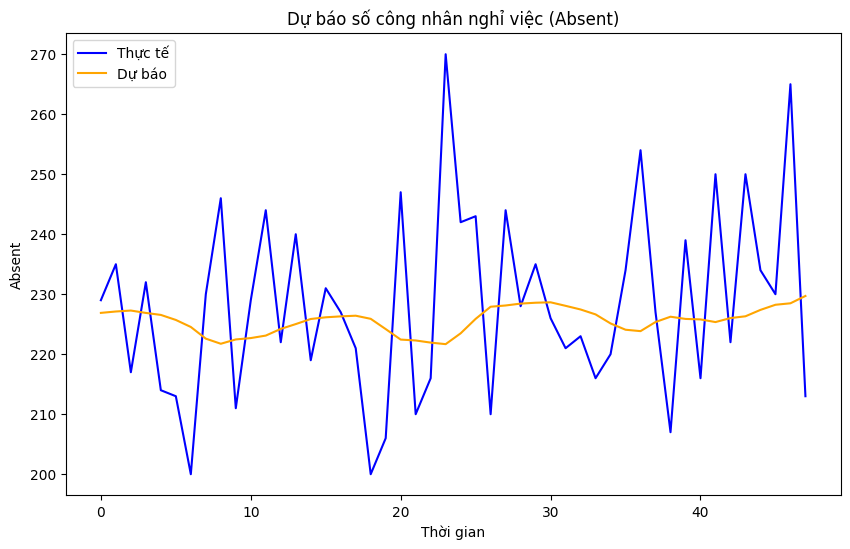

In [471]:
# So sánh giá trị thực tế và dự báo
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Thực tế', color='blue')
plt.plot(y_pred1, label='Dự báo', color='orange')
plt.title('Dự báo số công nhân nghỉ việc (Absent)')
plt.xlabel('Thời gian')
plt.ylabel('Absent')
plt.legend()
plt.show()

In [472]:
print(data.index[-1])
# Chuyển đổi chỉ mục thành DatetimeIndex  
data.index = pd.to_datetime(data.index)  # Đảm bảo chỉ mục là kiểu Datetime

2015-12-31 00:00:00


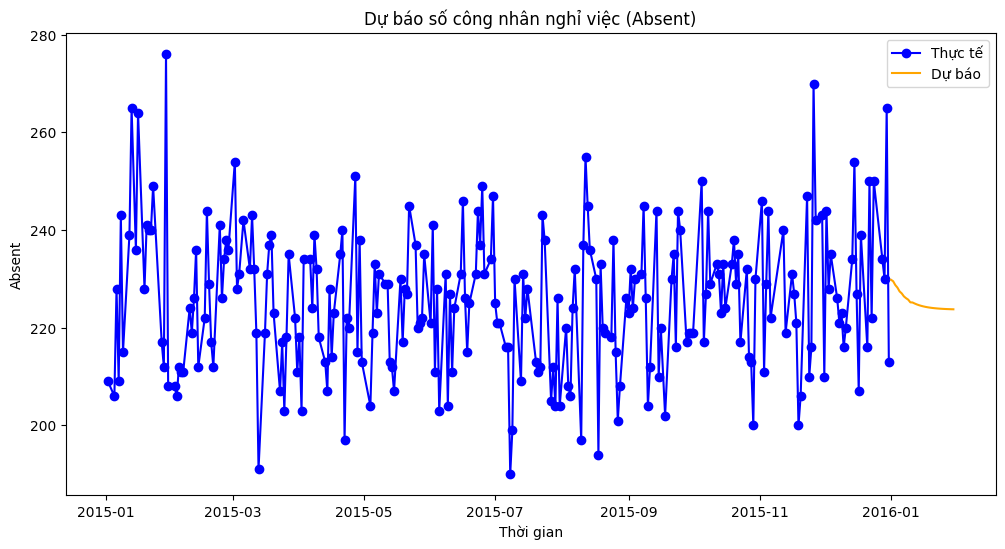

In [477]:
# Chuẩn bị đầu vào từ 10 ngày cuối cùng trong tập dữ liệu
last_look_back1 = X_test[-1]  # Lấy dữ liệu cuối cùng từ tập kiểm tra
future_predictions = []  # Lưu các dự báo 30 ngày tiếp theo

# Dự báo tuần tự cho 30 ngày tiếp theo
current_input1 = last_look_back1



# Dự báo 30 ngày tiếp theo
last_sequence1 = data_scaled[-look_back:]  # Lấy chuỗi 10 ngày cuối cùng
predictions1 = []

for _ in range(30):  # Dự báo 30 ngày
    pred1 = model1.predict(last_sequence1[np.newaxis, :, :], verbose=0)
    predictions1.append(pred1[0, 0])
    # Cập nhật chuỗi thời gian
    last_sequence1 = np.vstack([last_sequence1[1:], pred1])

# Chuyển đổi dự báo về giá trị gốc
predictions_actual1 = scaler.inverse_transform(np.array(predictions1).reshape(-1, 1))

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Absent'], label='Thực tế', color='blue',marker='o')
future_dates1 = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=30)
plt.plot(future_dates1, predictions_actual1, label='Dự báo', color='orange')
plt.title('Dự báo số công nhân nghỉ việc (Absent)')
plt.xlabel('Thời gian')
plt.ylabel('Absent')
plt.legend()
plt.show()